In [1]:
from corre import *

Use scipy logsumexp().


In [2]:
path = "../2yrdata/"
ern = pd.read_csv(path+"ern.csv",index_col="date")
us = gpd.read_file("zip://../2021data/cb_2018_us_state_5m.zip")
fil_func = lambda x: x in ["HI","GU","MP","AS","PR","AK","VI"]
sub_us = us[pd.Series(not fil_func(a) for a in us["STUSPS"])][["STATEFP","GEOID","STUSPS","NAME","geometry"]]
sub_us = sub_us.to_crs("EPSG:3395")

In [4]:
cp=['2020-06-14', '2021-02-10', '2021-06-23', '2021-11-25']
midpoints = ["2020-10-12","2021-04-17","2021-09-08"]
mid_snapshot = ern.transpose()[midpoints]
mid_snapshot.index.names = ['State']
merged = pd.merge(sub_us,mid_snapshot,left_on="NAME",right_on="State")

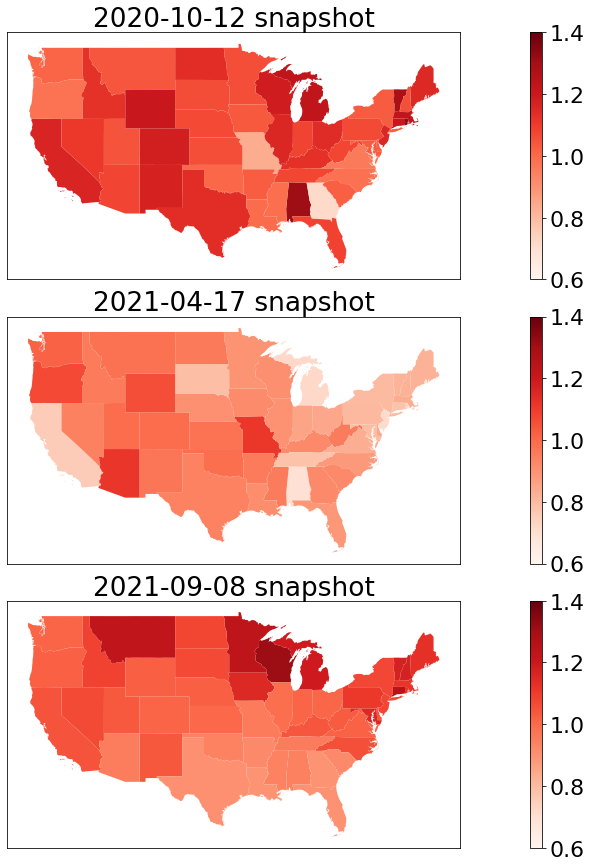

In [26]:
fig, ax = plt.subplots(3, 1,figsize = (25,15))
for i in range(3):
    merged.plot(column=midpoints[i], ax=ax[i], legend=True,vmin=0.6,vmax=1.4,cmap="Reds")
    ax[i].set_title(midpoints[i]+" snapshot")
    ax[i].tick_params(left = False,bottom=False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.subplots_adjust(hspace=0.15)
plt.savefig("../results/2yr/midsnapshot.pdf",bbox_inches="tight")

In [5]:
beg_snapshot = ern.transpose()[cp[:-1]]
beg_snapshot.index.names = ['State']
merged2 = pd.merge(sub_us,beg_snapshot,left_on="NAME",right_on="State")

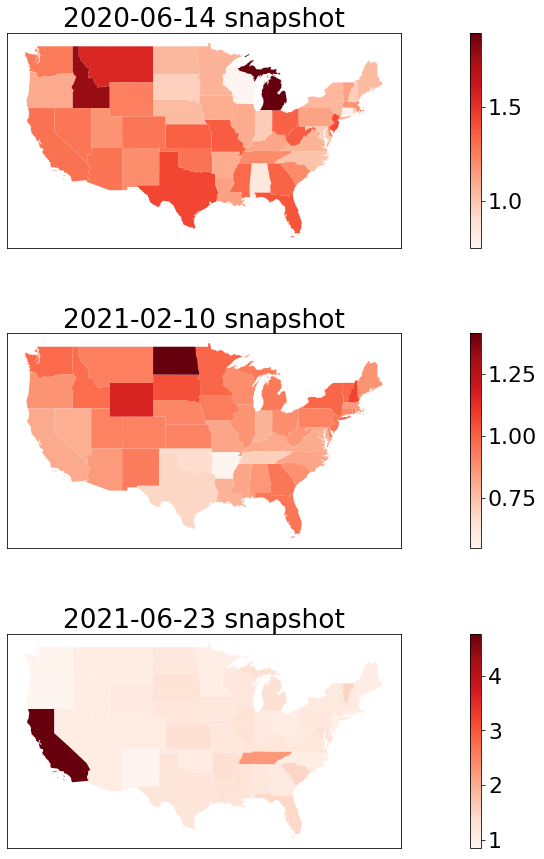

In [6]:
fig, ax = plt.subplots(3, 1,figsize = (25,15))
for i in range(3):
    merged2.plot(column=cp[i], ax=ax[i], legend=True,cmap="Reds")
    ax[i].set_title(cp[i]+" snapshot")
    ax[i].tick_params(left = False,bottom=False)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
fig.subplots_adjust(hspace=0.4)
plt.savefig("../results/2yr/begsnapshot.pdf",bbox_inches="tight")

In [15]:
merged2.describe()

,2020-06-14,2021-02-10,2021-06-23
count,49.000000,49.000000,49.000000
mean,1.182410,0.893108,1.255479
std,0.221929,0.128067,0.554547
min,0.749290,0.549964,0.844091
25%,1.045910,0.822588,1.064452
50%,1.171403,0.891535,1.155038
75%,1.292796,0.946852,1.271487
max,1.895773,1.411684,4.768700
